In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()

In [4]:
X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
depth_8 = DecisionTreeClassifier(max_depth = 8).fit(X, y)
depth_16 = DecisionTreeClassifier(max_depth = 16).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4", "Max depth = 8", "Max depth = 16"]

In [5]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

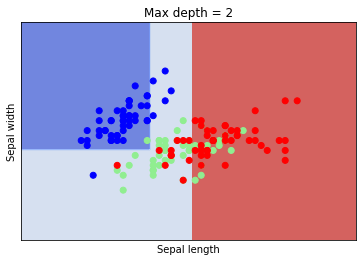

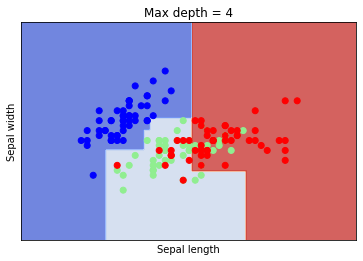

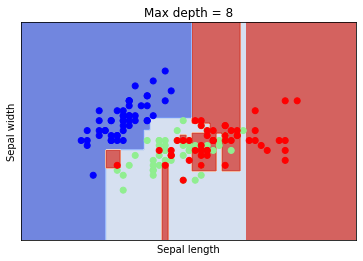

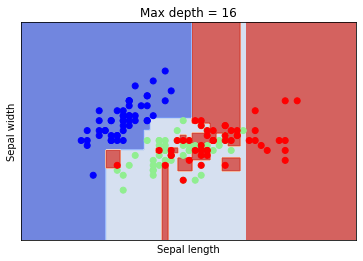

In [6]:
for i, classifier in enumerate((depth_2, depth_4, depth_8, depth_16)):
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()